# Special Topics in Computer Science
## INT3121 20 UET ----- 4-6 Wednesday 210 GD3
## Week 2

## Diep Ng., Ph.D.

Mail-to: ngocdiep at vnu.edu.vn



# Week 1: Homework answers


## 1. Get labels of CIFAR10

- Download data from here: https://www.cs.toronto.edu/~kriz/cifar.html
- Folder will include:
```
batches.meta
data_batch_1
data_batch_2
data_batch_3
data_batch_4
data_batch_5
readme.html
test_batch
```


In [10]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [11]:
# all training data files
data = ['cifar-10-batches-py/data_batch_{}'.format(i) for i in range(1, 6)]
data

['cifar-10-batches-py/data_batch_1',
 'cifar-10-batches-py/data_batch_2',
 'cifar-10-batches-py/data_batch_3',
 'cifar-10-batches-py/data_batch_4',
 'cifar-10-batches-py/data_batch_5']

In [12]:
#view first batch
d1 = unpickle(data[0])

In [13]:
d1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [14]:
d1[b'data'].shape #3072 = 32 height * 32 width * 3 channels 

(10000, 3072)

In [17]:
# view labels
labels = unpickle('cifar-10-batches-py/batches.meta')
labels

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [22]:
label_names = labels[b'label_names']
label_names

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [25]:
#convert to numeric labels

label_dict = {i:label_names[i] for i in range(len(label_names))}
label_dict

{0: b'airplane',
 1: b'automobile',
 2: b'bird',
 3: b'cat',
 4: b'deer',
 5: b'dog',
 6: b'frog',
 7: b'horse',
 8: b'ship',
 9: b'truck'}

In [26]:
# Note: in python 3, String literals and byte literals

label_dict = {i:label_names[i].decode("utf-8") for i in range(len(label_names))}
label_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [27]:
# just for test
'A' == b'A'

False

### More on python string literals

Reference: https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal

## Predict the label of a new image

After (or during - will learn) training a model, save it :)

```
model.save("path-to-save.h5")

```


In [28]:
# assume we have the model 'cifar10_ResNet20v1_model.092.h5'
# now, load it & do prediction
from keras.models import load_model

model = load_model('cifar10_ResNet20v1_model.092.h5')


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/Users/chupi/anaconda3/envs/deeplearning/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [29]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [30]:
%matplotlib inline

In [31]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [32]:
plt.rcParams['figure.figsize'] = [10, 8]

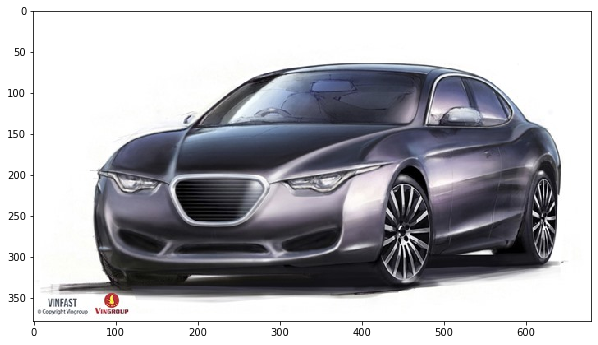

In [36]:
#read image
image = cv2.imread("w2-vinfast-car.jpg")
plt.imshow(image[:,:,::-1])


In [37]:
#check image size
image.shape

(378, 680, 3)

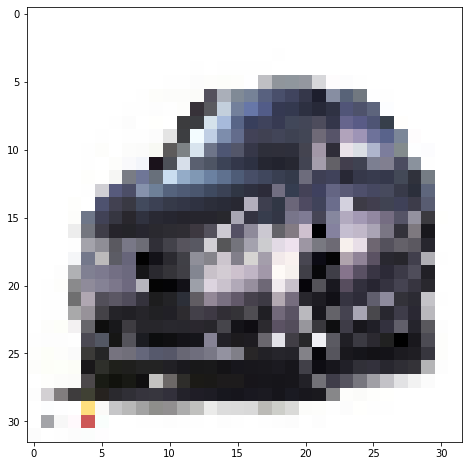

In [38]:
#resize image
resized = cv2.resize(image, (32, 32))
plt.imshow(resized[:,:,::-1])

In [39]:
#convert to cifar10 data (normalize and such)
def convertCIFAR10data(image):
    #resize
    x = cv2.resize(image, (32, 32))
    x = x.astype('float32')
    x /= 255
    return x


In [42]:
# prepare for prediction
x = convertCIFAR10data(image)

#model expect a tensor of shape [batch_size, image_width, image_height, number_of_channels]
xs = np.expand_dims(x, axis=0)


In [43]:
xs.shape

(1, 32, 32, 3)

In [45]:
#finally, predict
pred = model.predict(xs)

In [46]:
pred

array([[6.0663642e-05, 2.0248938e-01, 9.0904476e-05, 3.9685193e-02,
        3.1515474e-06, 1.5167537e-06, 9.9060378e-07, 4.2314900e-06,
        7.5702608e-01, 6.3792040e-04]], dtype=float32)

In [47]:
#get the id of the maximum probability
np.argmax(pred)

8

In [48]:
#convert to label names
label_dict[8]

'ship'

In [49]:
#haha


In [50]:
label_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [51]:
# okay, try another

image = cv2.imread("w2-cat.jpg")
x = convertCIFAR10data(image)
xs = np.expand_dims(x, axis=0)
pred_cls = np.argmax(model.predict(xs))
print(label_dict[pred_cls])

cat


In [52]:
##yeaahhhhhhh

# Week 2: CNN architectures

## 1. Where "Convolution" comes from?

### 1.1. Convolution and Correlation operators

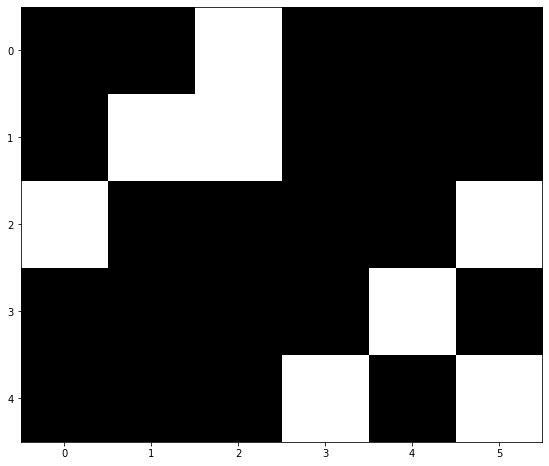

In [122]:
arr = [
    [0, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 1]
]

plt.imshow(arr, cmap='gray')

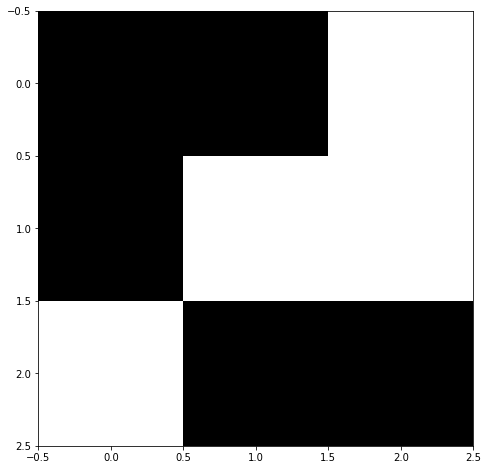

In [137]:
template = [
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 0]
]
plt.imshow(template, cmap='gray')

In [138]:
from scipy import signal


In [139]:
#output is same size with input
corr = signal.correlate2d(arr, template, mode='same')

In [140]:
corr

array([[0, 1, 2, 1, 0, 0],
       [1, 4, 1, 0, 0, 0],
       [2, 1, 0, 0, 1, 2],
       [0, 0, 0, 1, 3, 0],
       [0, 0, 1, 2, 1, 1]])

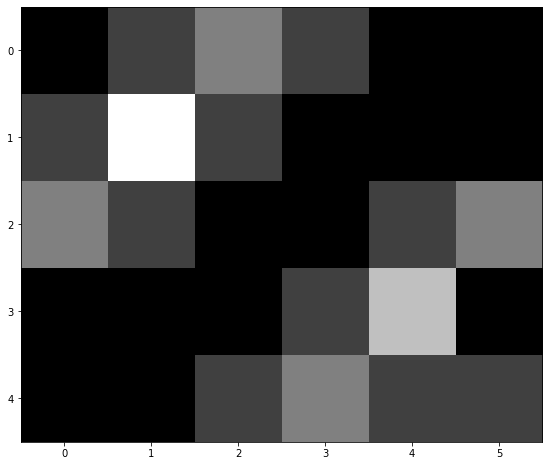

In [141]:
plt.imshow(corr, cmap='gray')

In [144]:
#find the center of the match
y, x = np.unravel_index(np.argmax(corr), corr.shape)
print("Center match coordinates: (x, y): ", x, y)

Center match coordinates: (x, y):  1 1


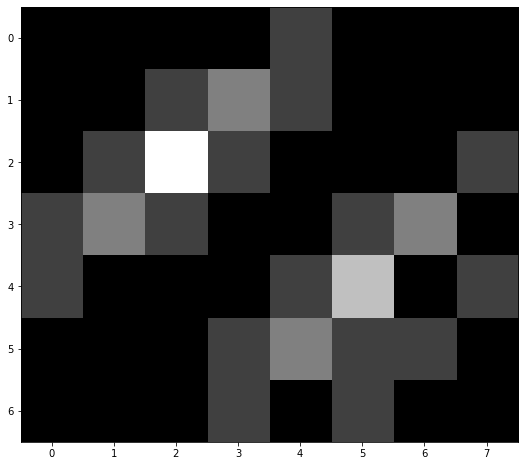

In [145]:
# mode='full', full cross-correlation of the input
full_corr = signal.correlate2d(arr, template, mode='full')
plt.imshow(full_corr, cmap='gray')

In [146]:
full_corr.shape

(7, 8)

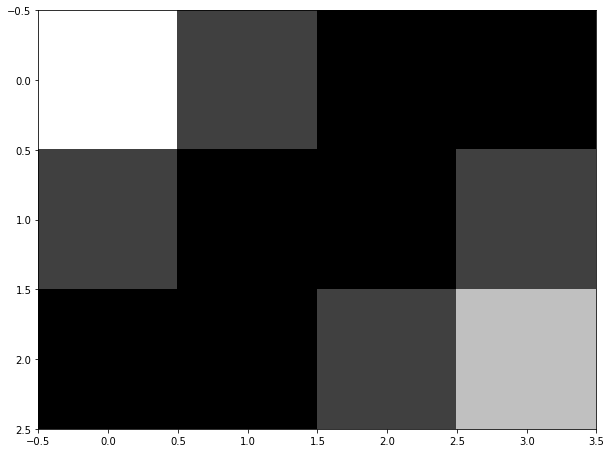

In [147]:
#mode = 'valid': throw away zero-padding
valid_corr = signal.correlate2d(arr, template, mode='valid')
plt.imshow(valid_corr, cmap='gray')

In [148]:
valid_corr.shape

(3, 4)

In [149]:
#actual convolution
conv = signal.convolve2d(arr, template, mode='same')
conv

array([[0, 0, 2, 2, 0, 0],
       [0, 3, 2, 1, 0, 0],
       [2, 2, 0, 0, 0, 2],
       [0, 0, 0, 0, 3, 1],
       [0, 0, 0, 2, 1, 1]])

In [150]:
corr

array([[0, 1, 2, 1, 0, 0],
       [1, 4, 1, 0, 0, 0],
       [2, 1, 0, 0, 1, 2],
       [0, 0, 0, 1, 3, 0],
       [0, 0, 1, 2, 1, 1]])

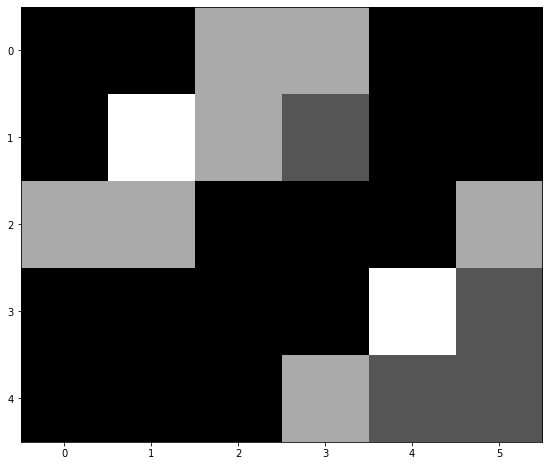

In [151]:
plt.imshow(conv, cmap='gray')

### Extra: Understand correlation and convolution

In 1-dimensional data:

<img src="w2-corr-conv.png" width="800">

- "Correlation is a function of *displacement* of the filter kernel relative to the image"
- "Convolving a function with an impulse yields a copy of the function at the location of the impulse"
- "A function that contains a single 1 with the rest being 0's is called a *discrete unit impulse*"

**Reference: R. C. Gonzalez, R. E. Woods, “Digital Image Processing,” 4th edition, Pearson, 2018.**

### 1.2. Correlation and Convolution in one dimension

In [89]:
#understand correlation and convolution in 1D
f = [0, 0, 0, 1, 0, 0, 0, 0]
w = [1, 2, 4, 2, 8]

signal.correlate(f, w, mode='same')

array([0, 8, 2, 4, 2, 1, 0, 0])

In [90]:
conv1 = signal.convolve(f, w, mode='same')
print("Using signal.convolve: ", conv1)

#rotate the kernel:
w_rotate = [8, 2, 4, 2, 1]
conv2 = signal.correlate(f, w_rotate, mode='same')
print("Rotate kernel then correlate: ", conv2)

Using signal.convolve:  [0 1 2 4 2 8 0 0]
Rotate kernel then correlate:  [0 1 2 4 2 8 0 0]


In [152]:
f = [0, 1, 2, 4, 2, 8, 0, 0]
w = [1, 2, 4, 2, 8]

print("Correlation: ", signal.correlate(f, w, mode='same'))
print("Convolution: ", signal.convolve(f, w, mode='same'))

Correlation:  [18 40 34 89 34 40 18  8]
Convolution:  [ 4 12 20 40 48 68 32 64]


### 1.3. Convolution/Correlation for spatial filtering = feature extraction

(-0.5, 511.5, 511.5, -0.5)

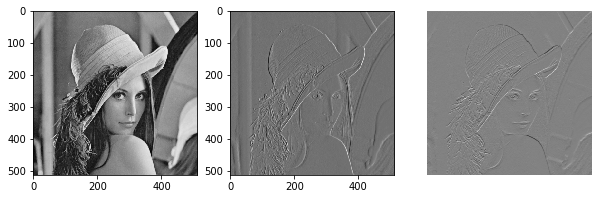

In [178]:
image = cv2.imread("lena.jpg", 0)
#detect horizontal change
gx = [
    [-1, 0, +1],
    [-2, 0, +2],
    [-1, 0, +1]
]

#detect vertical change
gy = [
    [-1, -2, -1],
    [0 ,  0,  0],
    [+1, +2, +1]
]

sobel_x = signal.convolve2d(image, gx, mode='same')
sobel_y = signal.convolve2d(image, gy, mode='same')
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.axis("off")

#### What happens if using correlation instead?

(-0.5, 511.5, 511.5, -0.5)

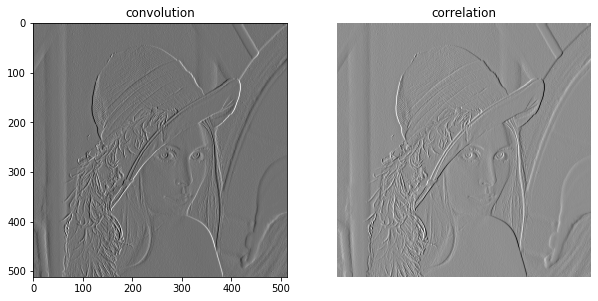

In [180]:
#using correlation
sobel_x_corr = signal.correlate2d(image, gx, mode='same')
plt.subplot(1, 2, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title("convolution")
plt.subplot(1, 2, 2)
plt.imshow(sobel_x_corr, cmap='gray')
plt.title("correlation")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

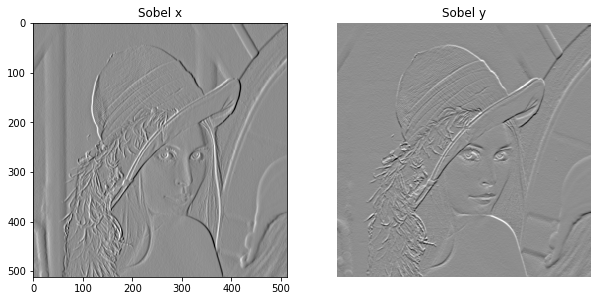

In [183]:
## Using opencv
sobel_x_opencv = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y_opencv = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

plt.subplot(1, 2, 1)
plt.imshow(sobel_x_opencv, cmap='gray')
plt.title("Sobel x")
plt.subplot(1, 2, 2)
plt.imshow(sobel_y_opencv, cmap='gray')
plt.title("Sobel y")
plt.axis('off')

### 1. 4. Why called "convolutional neural networks"?

Convolution kernel = flipped version of correlation kernel

When training a neural network, the weights of a filter learnt using cross-correlation is the flipped version of kernels trained with convolution :)


## 2. Define Convolution layers in Keras

## 3. Define CNNs in Keras

### Model with Dense layers

In [157]:
#only fully connected layers

from keras.models import Sequential
from keras.layers import *

model = Sequential()
model.add(Dense(4, input_shape=(3,)))
model.add(Dense(5))
model.add(Dense(2))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 12        
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


### LeNet-5 architecture

In [159]:
# LeNet-5 architecture
# LeCun, Yann, et al. "Gradient-based learning applied to document recognition."
# Proceedings of the IEEE 86.11 (1998): 2278-2324.
#Code reference: https://github.com/TaavishThaman/LeNet-5-with-Keras/blob/master/lenet_5.py
model = Sequential()
#Layer 1
#Conv Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))
#Pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Layer 2
#Conv Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Flatten
model.add(Flatten())
#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))
#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))
#Layer 5
#Output Layer
model.add(Dense(units = 10, activation = 'softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_14 (Dense)             (None, 84)                10164     
__________

In [161]:
# Plot model graph
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='lenet5.png')

<img src="lenet5.png" width="500">

In [ ]:
#or using
from IPython.display import Image
Image(retina=True, filename='lenet5.png')

### AlexNet

New concepts:
- deeper
- ReLU activation

In [189]:
from keras.models import Model


in_shape=(227,227,3)
n_classes=1000

in_layer = Input(in_shape)
conv1 = Conv2D(96, 11, strides=4, activation='relu')(in_layer)
pool1 = MaxPool2D(3, 2)(conv1)
conv2 = Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
pool2 = MaxPool2D(3, 2)(conv2)
conv3 = Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
conv4 = Conv2D(256, 3, strides=1, padding='same', activation='relu')(conv3)
pool3 = MaxPool2D(3, 2)(conv4)
flattened = Flatten()(pool3)
dense1 = Dense(4096, activation='relu')(flattened)
drop1 = Dropout(0.5)(dense1)
dense2 = Dense(4096, activation='relu')(drop1)
drop2 = Dropout(0.5)(dense2)
preds = Dense(n_classes, activation='softmax')(drop2)

model = Model(in_layer, preds)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='alexnet.png')
print(model.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 384)       885120    
___________________________

<img src="alexnet.png" width="500">

### VGGNet

Blocks of layers

In [195]:
#references: https://github.com/keras-team/keras-applications/blob/master/keras_applications/vgg16.py
from keras import layers

input_shape = (224, 224, 3)
num_classes = 1000

img_input = Input(input_shape)
# Block 1
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv1')(img_input)
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv1')(x)
x = layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv1')(x)
x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv2')(x)
x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv1')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv2')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv1')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv2')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# Classification block
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(4096, activation='relu', name='fc1')(x)
x = layers.Dense(4096, activation='relu', name='fc2')(x)
x = layers.Dense(num_classes, activation='softmax', name='predictions')(x)

model = Model(img_input, x, name='vgg16')

plot_model(model, show_shapes=True, show_layer_names=True, to_file='vgg16.png')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

<img src="vgg16.png" width="500">

### GoogLeNet/Inception

New concepts:
- 1x1 convolution for dimensionality reduction
- Global average pooling
- Batch normalization
- RMSprop

Reference code: https://github.com/keras-team/keras-applications/blob/master/keras_applications/inception_v3.py

<img src="w2-inception.jpg" width="900">

### ResNet 

New concepts:
- Residual network
- Skip connections

Reference code: https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet.py

<img src="w2-resnet-skip.jpg" width="500">

# Homeworks:

1. Code Inception and ResNet models :)
2. Confirm code of other models --> yeah :D